<a href="https://colab.research.google.com/github/cvillarr123/trading/blob/master/balance_v001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
!git clone https://github.com/chrisconlan/algorithmic-trading-with-python.git


Cloning into 'algorithmic-trading-with-python'...
remote: Enumerating objects: 341, done.
remote: Counting objects: 100% (341/341), done.
remote: Compressing objects: 100% (314/314), done.
remote: Total 341 (delta 44), reused 312 (delta 24), pack-reused 0
Receiving objects: 100% (341/341), 4.83 MiB | 18.81 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [163]:
!pip install alpha_vantage

In [164]:
!pip install alpha_vantage pandas

In [165]:
!pip install  plotly

In [166]:
%cd algorithmic-trading-with-python/src/

/content/algorithmic-trading-with-python/src/algorithmic-trading-with-python/src


In [167]:
!ls

bootstrap_portfolio.py	       pypm
fit_alternative_data_model.py  simulate_alternative_data_portfolio.py
__init__.py		       simulate_portfolio.py
optimize_portfolio.py	       white_noise_portfolio.py


In [168]:
import sys
sys.path.insert(0, '/content/algorithmic-trading-with-python/src/pypm')

In [169]:
import pypm
from pypm import metrics
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
# Make plots bigger
import datetime
import numpy as np
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

pd.set_option('max_colwidth', 400)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

metrics.calculate_calmar_ratio

<function pypm.metrics.calculate_calmar_ratio>

In [170]:
def drawCandleStick(data):
    candlestick = go.Candlestick(
        x = data.index,
        open = data['open'],
        high = data['high'], 
        low = data['low'],
        close = data['close']
    )
    # create a plot


    fig = go.Figure(data=[candlestick])
    fig.show()

In [171]:
fromD = 'GBP'
toD='AUD'
# **Ver el precio de intercambio al cierre**

from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint
cc = ForeignExchange(key='1035HSNE5D7XWHLM',output_format='pandas')

# There is no metadata in this call
data_exchange_rate, meta_exchange_rate = cc.get_currency_exchange_rate(from_currency=fromD,to_currency=toD)

#data_exchange_rate.head(5)




In [172]:
# para analisis diario
columns = ['open','high','low','close']

data_daily, meta_daily = cc.get_currency_exchange_daily ( 'GBP','AUD',outputsize='compact')

data_daily.columns = columns
data_daily.sort_index(ascending=True,inplace=True)
data_daily["TradeDate"] = data_daily.index.date
data_daily.TradeDate = pd.to_datetime(data_daily.TradeDate, format='%Y-%m-%d')


#data_daily['DateIndex'] = pd.to_datetime(data_daily.TradeDate, format='%Y-%m-%d')

data_daily.reset_index(drop=True,inplace=True)
#data_daily.set_index('DateIndex',inplace=True)

data_daily.dtypes






open                float64
high                float64
low                 float64
close               float64
TradeDate    datetime64[ns]
dtype: object

In [173]:
data_daily.head()
#cuack=data_daily[ (data_daily.TradeDate  >= pd.to_datetime('2021-02-01', format='%Y-%m-%d')) & ( data_daily.TradeDate  < pd.to_datetime('2021-06-21', format='%Y-%m-%d')) ]
#cuack.head()

,open,high,low,close,TradeDate
0,1.79850,1.80236,1.78736,1.78899,2021-02-05
1,1.78729,1.79046,1.78146,1.78311,2021-02-08
2,1.78325,1.78836,1.78106,1.78480,2021-02-09
3,1.78524,1.79265,1.78301,1.79094,2021-02-10
4,1.79117,1.79246,1.77873,1.78215,2021-02-11


In [174]:
np.max(data_daily.TradeDate)

Timestamp('2021-06-24 00:00:00')

In [175]:
np.min(data_daily.TradeDate)

Timestamp('2021-02-05 00:00:00')

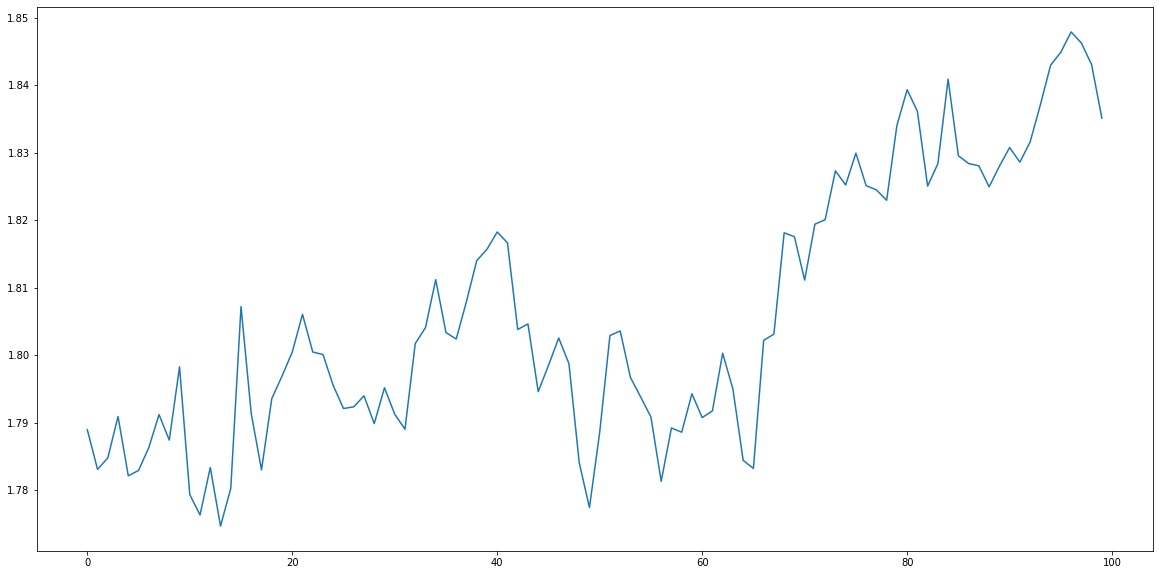

In [176]:
plt.plot(data_daily["close"])

In [177]:

# para analisis mensual

data_monthly, meta_monthly = cc.get_currency_exchange_monthly('GBP','AUD',outputsize='compact')


#data_monthly.head(5)



In [178]:

# Ver el intraday para el calculo de banderas

data_intraday, meta_intraday = cc.get_currency_exchange_intraday('GBP','AUD',interval='15min',outputsize='full')

data_intraday.columns = columns
data_intraday.sort_index(ascending=True,inplace=True)
data_intraday['TradeDate'] = data_intraday.index.date 


data_intraday['time'] = data_intraday.index.time
data_intraday["date"] = data_intraday.index.to_pydatetime()

format = '%Y-%m-%d %H:%M:%S'

data_intraday['date'] = pd.to_datetime(data_intraday.date, format=format)
data_intraday = data_intraday.set_index(pd.DatetimeIndex(data_intraday['date']))

data_daily.sort_index(ascending=True,inplace=True)

data_intraday.reset_index(drop=True,inplace=True)

#data_intraday.set_index('date',inplace=True)



data_intraday.head(10)

,open,high,low,close,TradeDate,time,date
0,1.82195,1.82230,1.82108,1.82213,2021-06-10,08:00:00,2021-06-10 08:00:00
1,1.82216,1.82224,1.82114,1.82178,2021-06-10,08:15:00,2021-06-10 08:15:00
2,1.82178,1.82201,1.82044,1.82149,2021-06-10,08:30:00,2021-06-10 08:30:00
3,1.82156,1.82158,1.81957,1.82054,2021-06-10,08:45:00,2021-06-10 08:45:00
4,1.82049,1.82119,1.81909,1.82022,2021-06-10,09:00:00,2021-06-10 09:00:00
5,1.82026,1.82137,1.81983,1.82119,2021-06-10,09:15:00,2021-06-10 09:15:00
6,1.82108,1.82134,1.82005,1.82077,2021-06-10,09:30:00,2021-06-10 09:30:00
7,1.82077,1.82181,1.82041,1.82108,2021-06-10,09:45:00,2021-06-10 09:45:00
8,1.82113,1.82194,1.82070,1.82148,2021-06-10,10:00:00,2021-06-10 10:00:00
9,1.82147,1.82161,1.82030,1.82063,2021-06-10,10:15:00,2021-06-10 10:15:00


In [179]:
data_intraday.dtypes

open                float64
high                float64
low                 float64
close               float64
TradeDate            object
time                 object
date         datetime64[ns]
dtype: object

In [180]:
data_intraday.head(10)

,open,high,low,close,TradeDate,time,date
0,1.82195,1.82230,1.82108,1.82213,2021-06-10,08:00:00,2021-06-10 08:00:00
1,1.82216,1.82224,1.82114,1.82178,2021-06-10,08:15:00,2021-06-10 08:15:00
2,1.82178,1.82201,1.82044,1.82149,2021-06-10,08:30:00,2021-06-10 08:30:00
3,1.82156,1.82158,1.81957,1.82054,2021-06-10,08:45:00,2021-06-10 08:45:00
4,1.82049,1.82119,1.81909,1.82022,2021-06-10,09:00:00,2021-06-10 09:00:00
5,1.82026,1.82137,1.81983,1.82119,2021-06-10,09:15:00,2021-06-10 09:15:00
6,1.82108,1.82134,1.82005,1.82077,2021-06-10,09:30:00,2021-06-10 09:30:00
7,1.82077,1.82181,1.82041,1.82108,2021-06-10,09:45:00,2021-06-10 09:45:00
8,1.82113,1.82194,1.82070,1.82148,2021-06-10,10:00:00,2021-06-10 10:00:00
9,1.82147,1.82161,1.82030,1.82063,2021-06-10,10:15:00,2021-06-10 10:15:00


In [181]:
#omitir las fechas de fin de semana
data_intraday = data_intraday[data_intraday.date.dt.dayofweek < 5 ]

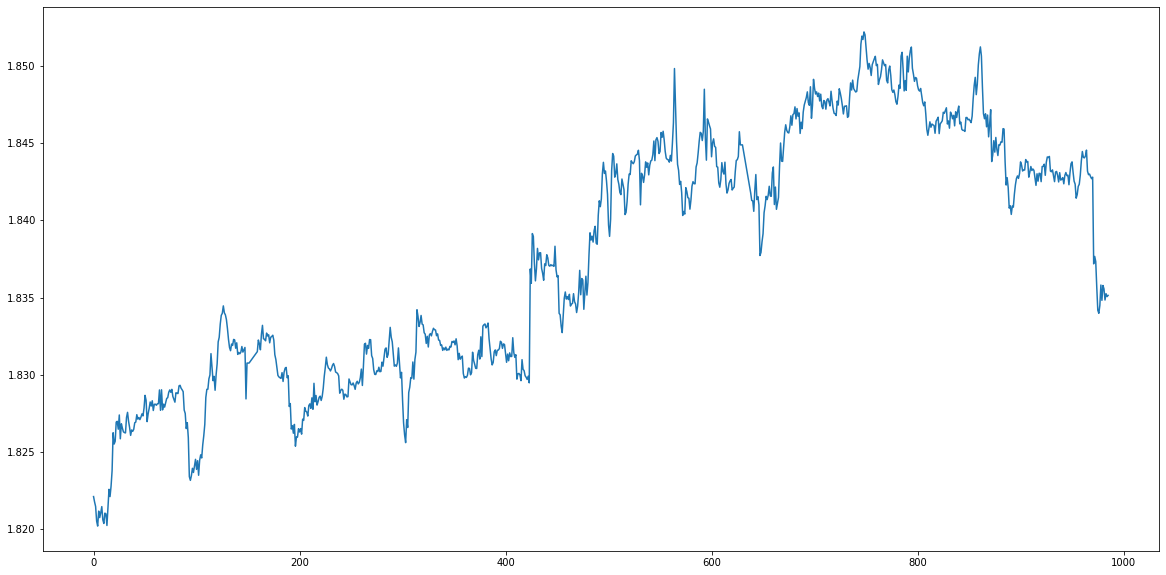

In [182]:
plt.plot(data_intraday["close"])

In [183]:
data_intraday.groupby('TradeDate').agg({'low':min, 'high':max})

,low,high
TradeDate,,
2021-06-10,1.81909,1.82888
2021-06-11,1.82191,1.83500
2021-06-14,1.82473,1.83366
2021-06-15,1.82473,1.83486
2021-06-16,1.82897,1.84018
2021-06-17,1.82960,1.84488
2021-06-18,1.83955,1.85022
2021-06-21,1.83655,1.84955
2021-06-22,1.84411,1.85237


In [184]:
#data_intraday['TradeDate'].unique()

data_intraday[data_intraday['TradeDate']==pd.to_datetime('2021-06-10', format='%Y-%m-%d')].head(10)

,open,high,low,close,TradeDate,time,date
0,1.82195,1.82230,1.82108,1.82213,2021-06-10,08:00:00,2021-06-10 08:00:00
1,1.82216,1.82224,1.82114,1.82178,2021-06-10,08:15:00,2021-06-10 08:15:00
2,1.82178,1.82201,1.82044,1.82149,2021-06-10,08:30:00,2021-06-10 08:30:00
3,1.82156,1.82158,1.81957,1.82054,2021-06-10,08:45:00,2021-06-10 08:45:00
4,1.82049,1.82119,1.81909,1.82022,2021-06-10,09:00:00,2021-06-10 09:00:00
5,1.82026,1.82137,1.81983,1.82119,2021-06-10,09:15:00,2021-06-10 09:15:00
6,1.82108,1.82134,1.82005,1.82077,2021-06-10,09:30:00,2021-06-10 09:30:00
7,1.82077,1.82181,1.82041,1.82108,2021-06-10,09:45:00,2021-06-10 09:45:00
8,1.82113,1.82194,1.82070,1.82148,2021-06-10,10:00:00,2021-06-10 10:00:00
9,1.82147,1.82161,1.82030,1.82063,2021-06-10,10:15:00,2021-06-10 10:15:00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


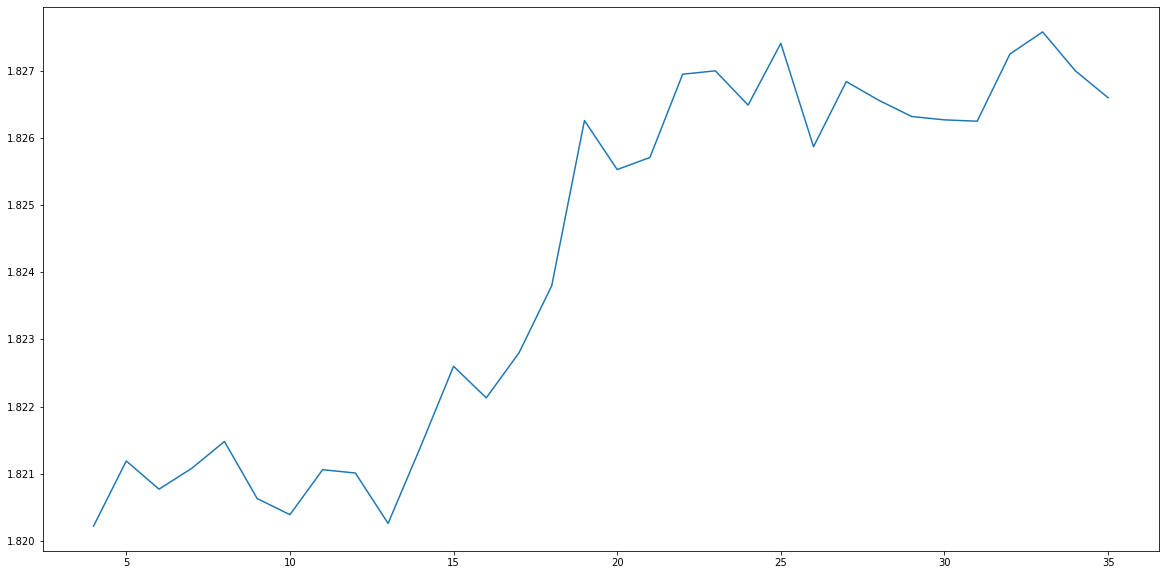

In [185]:
#muestro el precio de cierre en este horario para el dia 18 de junio 2021
#plt.plot(data_intraday.set_index('date').between_time('09:30:00','16:00:00')["close"])

filter = (data_intraday.date.dt.hour > 8 ) &  ( data_intraday.date.dt.hour  < 17 )
filter2 = data_intraday['TradeDate']==pd.to_datetime('2021-06-10', format='%Y-%m-%d')


plt.plot( data_intraday[filter][filter2]["close"])
#plt.plot( data_intraday[filter][filter2].set_index('date')["close"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


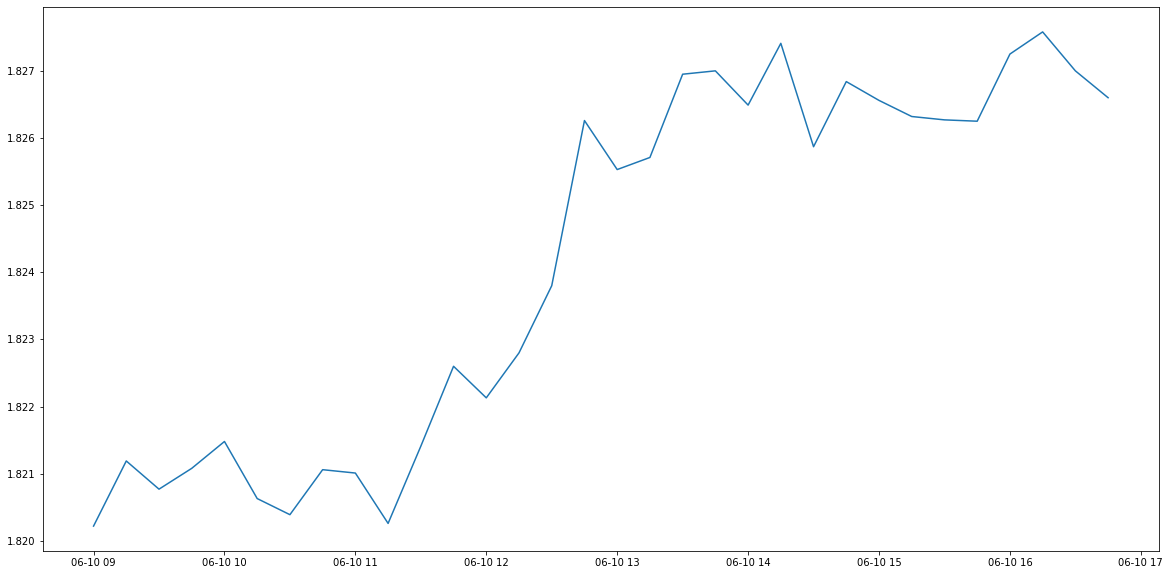

In [186]:
plt.plot( data_intraday[filter][filter2].set_index('date')["close"])

In [189]:
drawCandleStick(data_intraday.set_index('date').loc['2021-06-23'])


NameError: ignored

In [190]:
#pongo el horario operativo  de las 9:30 hasta las 16:00
market = data_intraday.set_index('date').between_time('09:30:00','16:00:00').copy()
market.sort_index(inplace=True)
market.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 2021-06-10 09:30:00 to 2021-06-24 14:45:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       292 non-null    float64
 1   high       292 non-null    float64
 2   low        292 non-null    float64
 3   close      292 non-null    float64
 4   TradeDate  292 non-null    object 
 5   time       292 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.0+ KB


In [191]:
market.groupby('TradeDate').agg({'low':min, 'high':max})

,low,high
TradeDate,,
2021-06-10,1.81955,1.82838
2021-06-11,1.82277,1.83500
2021-06-14,1.82496,1.82972
2021-06-15,1.82473,1.83486
2021-06-16,1.82897,1.83265
2021-06-17,1.83698,1.84488
2021-06-18,1.84084,1.84852
2021-06-21,1.84471,1.84955
2021-06-22,1.84671,1.85188


In [192]:
plt.plot(data_intraday.loc['2021-06-23']["close"])

KeyError: ignored

In [193]:
data_intraday.groupby('TradeDate').agg({'low':min, 'high':max})

,low,high
TradeDate,,
2021-06-10,1.81909,1.82888
2021-06-11,1.82191,1.83500
2021-06-14,1.82473,1.83366
2021-06-15,1.82473,1.83486
2021-06-16,1.82897,1.84018
2021-06-17,1.82960,1.84488
2021-06-18,1.83955,1.85022
2021-06-21,1.83655,1.84955
2021-06-22,1.84411,1.85237


In [194]:
# busca en que registro (fecha completa hora min seg) se dio el precio minimo para ese dia,
# se lo puede verificar con el dato proporcionado antes
data_intraday.loc[data_intraday.groupby('TradeDate')['low'].idxmin()]

,open,high,low,close,TradeDate,time,date
4,1.82049,1.82119,1.81909,1.82022,2021-06-10,09:00:00,2021-06-10 09:00:00
94,1.82343,1.82397,1.82191,1.82318,2021-06-11,07:30:00,2021-06-11 07:30:00
196,1.82680,1.82710,1.82473,1.82539,2021-06-14,09:15:00,2021-06-14 09:15:00
303,1.82604,1.82621,1.82473,1.82562,2021-06-15,12:00:00,2021-06-15 12:00:00
415,1.83003,1.83015,1.82897,1.82963,2021-06-16,16:00:00,2021-06-16 16:00:00
454,1.83389,1.83396,1.82960,1.83316,2021-06-17,01:45:00,2021-06-17 01:45:00
574,1.84055,1.84089,1.83955,1.84041,2021-06-18,07:45:00,2021-06-18 07:45:00
648,1.83774,1.83822,1.83655,1.83793,2021-06-21,02:30:00,2021-06-21 02:30:00
821,1.84594,1.84743,1.84411,1.84562,2021-06-22,21:45:00,2021-06-22 21:45:00
892,1.84041,1.84122,1.83979,1.84093,2021-06-23,15:30:00,2021-06-23 15:30:00


In [195]:
# busca en que registro (fecha completa hora min seg) se dio el precio maximo para ese dia,
# se lo puede verificar con el dato proporcionado antes
data_intraday.loc[data_intraday.groupby('TradeDate')['high'].idxmax()]

,open,high,low,close,TradeDate,time,date
51,1.82871,1.82888,1.82793,1.82836,2021-06-10,20:45:00,2021-06-10 20:45:00
124,1.83336,1.83500,1.83289,1.83386,2021-06-11,15:00:00,2021-06-11 15:00:00
164,1.83270,1.83366,1.83229,1.83321,2021-06-14,01:15:00,2021-06-14 01:15:00
315,1.83429,1.83486,1.83193,1.83379,2021-06-15,15:00:00,2021-06-15 15:00:00
427,1.83903,1.84018,1.83699,1.83896,2021-06-16,19:00:00,2021-06-16 19:00:00
505,1.84434,1.84488,1.84284,1.84416,2021-06-17,14:30:00,2021-06-17 14:30:00
565,1.84986,1.85022,1.84725,1.84742,2021-06-18,05:30:00,2021-06-18 05:30:00
701,1.84855,1.84955,1.84745,1.84818,2021-06-21,15:45:00,2021-06-21 15:45:00
746,1.85132,1.85237,1.85095,1.85193,2021-06-22,03:00:00,2021-06-22 03:00:00
862,1.85123,1.85201,1.85059,1.85064,2021-06-23,08:00:00,2021-06-23 08:00:00


In [196]:
!pip install pandas_ta
#https://github.com/twopirllc/pandas-ta#stable


     |████████████████████████████████| 92kB 8.2MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.2.45b0-cp37-none-any.whl size=175305 sha256=45f052af7e3c46325271dda7c9c77ef933ee8e9c7bcf9a7db3e2a41489c36fd7
  Stored in directory: /root/.cache/pip/wheels/78/76/74/e4b09c98fc91d7e1e0a56f4fe067796f216deacaa509234579
Successfully built pandas-ta


In [197]:
import pandas_ta as ta


In [198]:
# Calculate Returns and append to the df DataFrame
data_intraday.ta.log_return(cumulative=False, append=True)
data_intraday.ta.percent_return(cumulative=False, append=True)

# New Columns with results
data_intraday.columns

# Take a peek
data_intraday.head()

,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1
0,1.82195,1.82230,1.82108,1.82213,2021-06-10,08:00:00,2021-06-10 08:00:00,NaN,NaN
1,1.82216,1.82224,1.82114,1.82178,2021-06-10,08:15:00,2021-06-10 08:15:00,-0.000192,-0.000192
2,1.82178,1.82201,1.82044,1.82149,2021-06-10,08:30:00,2021-06-10 08:30:00,-0.000159,-0.000159
3,1.82156,1.82158,1.81957,1.82054,2021-06-10,08:45:00,2021-06-10 08:45:00,-0.000522,-0.000522
4,1.82049,1.82119,1.81909,1.82022,2021-06-10,09:00:00,2021-06-10 09:00:00,-0.000176,-0.000176


In [199]:
data_intraday["close_return"] = metrics.calculate_return_series(data_intraday.close)
data_intraday["close_log_return"] = metrics.calculate_log_return_series(data_intraday.close)

In [200]:
data_intraday.head()

,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1,close_return,close_log_return
0,1.82195,1.82230,1.82108,1.82213,2021-06-10,08:00:00,2021-06-10 08:00:00,NaN,NaN,NaN,NaN
1,1.82216,1.82224,1.82114,1.82178,2021-06-10,08:15:00,2021-06-10 08:15:00,-0.000192,-0.000192,-0.000192,-0.000192
2,1.82178,1.82201,1.82044,1.82149,2021-06-10,08:30:00,2021-06-10 08:30:00,-0.000159,-0.000159,-0.000159,-0.000159
3,1.82156,1.82158,1.81957,1.82054,2021-06-10,08:45:00,2021-06-10 08:45:00,-0.000522,-0.000522,-0.000522,-0.000522
4,1.82049,1.82119,1.81909,1.82022,2021-06-10,09:00:00,2021-06-10 09:00:00,-0.000176,-0.000176,-0.000176,-0.000176


In [204]:
#MVS30 = pd.DataFrame()
#MVS30['close']=market['close'].rolling(window=30).mean()
data_intraday['MVS30']=data_intraday['close'].rolling(window=30).mean()

In [205]:
#MVS30[MVS30.close.notna()].head()

In [206]:
#MVS100 = pd.DataFrame()
#MVS100['close']=market['close'].rolling(window=100).mean()
data_intraday['MVS100']=data_intraday['close'].rolling(window=100).mean()

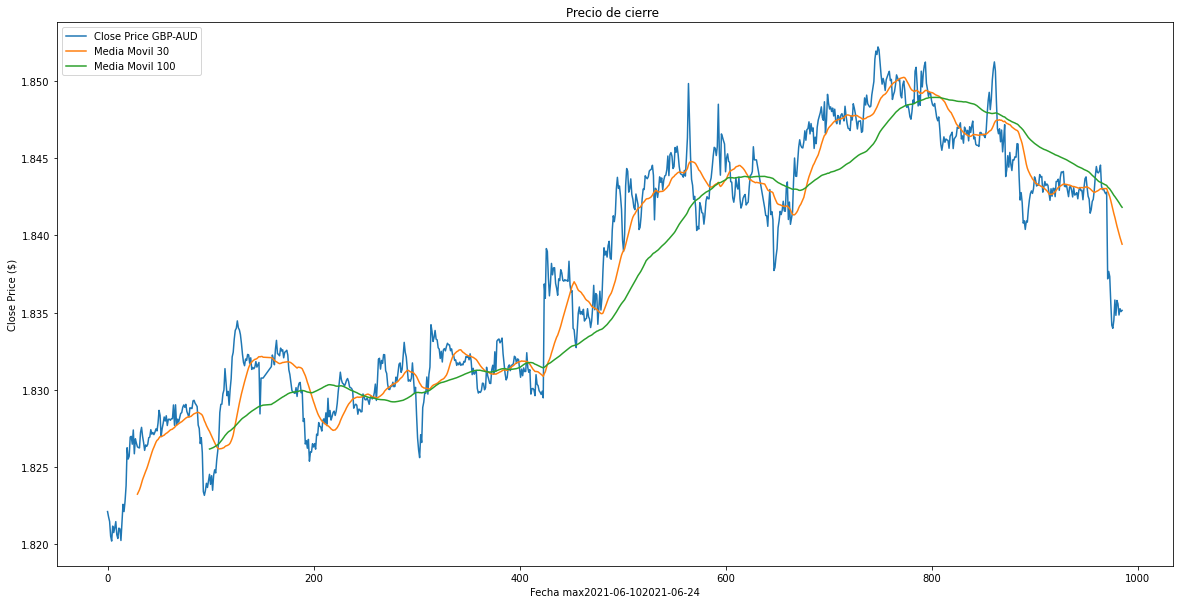

In [207]:
plt.figure()
plt.plot(data_intraday['close'], label = 'Close Price GBP-AUD')
plt.plot(data_intraday['MVS30'], label = 'Media Movil 30')
plt.plot(data_intraday['MVS100'], label = 'Media Movil 100')
plt.title('Precio de cierre '  )
plt.xlabel( 'Fecha max' +  str( np.min(data_intraday.TradeDate) ) + str(np.max(data_intraday.TradeDate)  ))
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()


In [208]:
analisis_diario = data_daily.copy()

In [209]:
analisis_diario['MVS30']=analisis_diario['close'].rolling(window=30).mean()

In [210]:
analisis_diario['MVS60']=analisis_diario['close'].rolling(window=60).mean()

In [211]:
analisis_diario.head(10)

,open,high,low,close,TradeDate,MVS30,MVS60
0,1.79850,1.80236,1.78736,1.78899,2021-02-05,NaN,NaN
1,1.78729,1.79046,1.78146,1.78311,2021-02-08,NaN,NaN
2,1.78325,1.78836,1.78106,1.78480,2021-02-09,NaN,NaN
3,1.78524,1.79265,1.78301,1.79094,2021-02-10,NaN,NaN
4,1.79117,1.79246,1.77873,1.78215,2021-02-11,NaN,NaN
5,1.78147,1.78913,1.77861,1.78295,2021-02-12,NaN,NaN
6,1.78328,1.78943,1.78189,1.78633,2021-02-15,NaN,NaN
7,1.78608,1.79432,1.78523,1.79122,2021-02-16,NaN,NaN
8,1.79141,1.79666,1.78582,1.78744,2021-02-17,NaN,NaN
9,1.78628,1.80236,1.78473,1.79829,2021-02-18,NaN,NaN


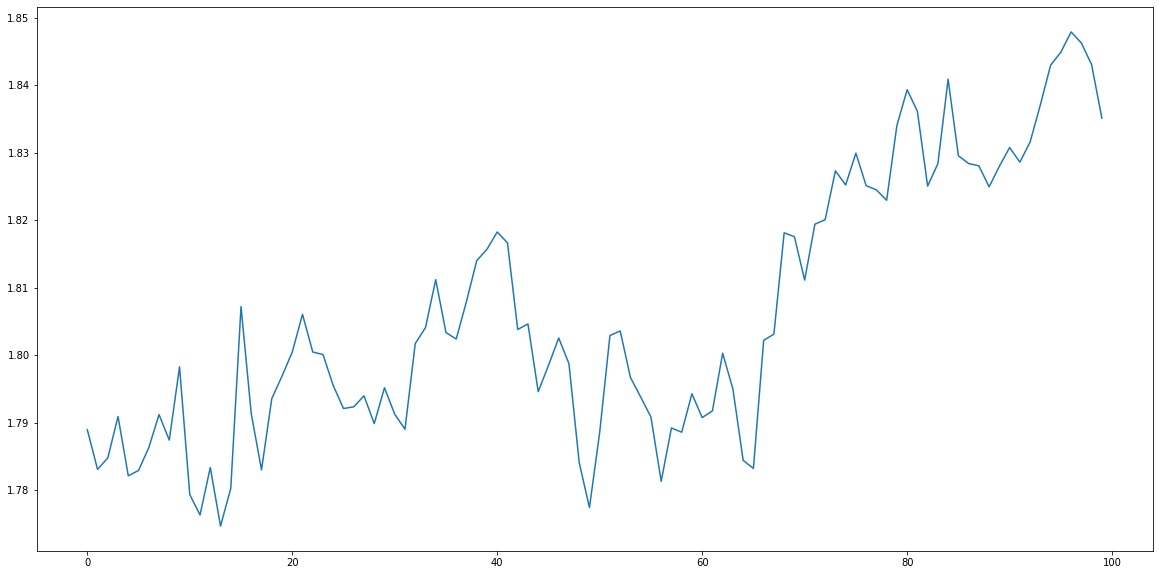

In [212]:


plt.plot(analisis_diario['close'], label = 'Close Price GBP-AUD')

#market = data_intraday.between_time('09:30:00','16:00:00').copy()
#market.sort_index(inplace=True)

#market.plot(market.close)
#plt.plot(analisis_diario["close"])

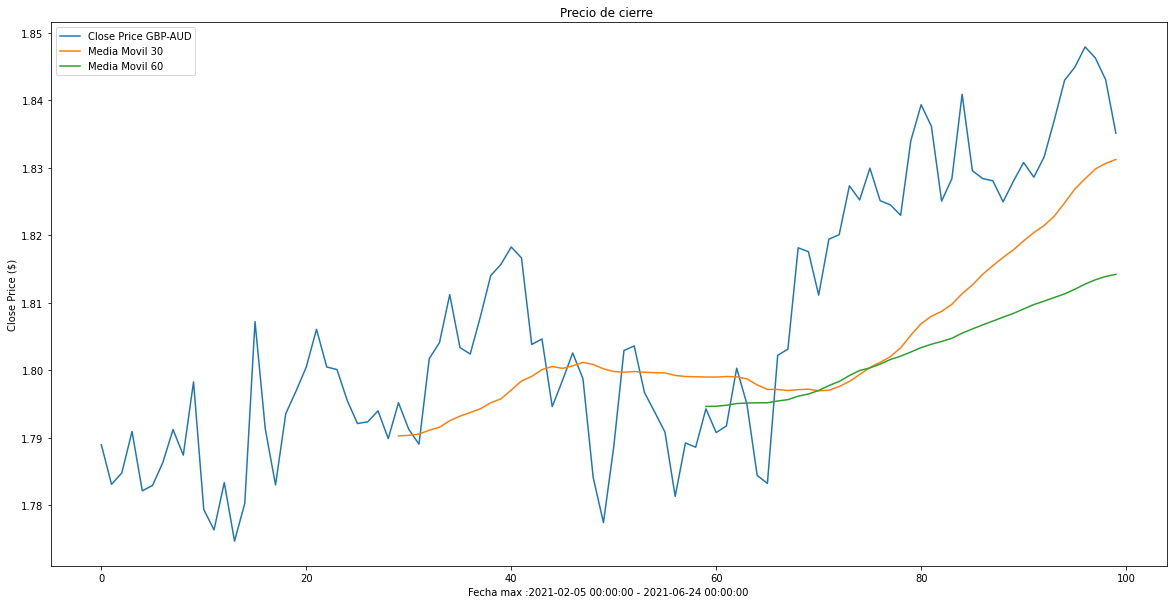

In [213]:
plt.figure()
plt.plot(analisis_diario['close'], label = 'Close Price GBP-AUD')
plt.plot(analisis_diario['MVS30'], label = 'Media Movil 30')
plt.plot(analisis_diario['MVS60'], label = 'Media Movil 60')
plt.title('Precio de cierre '  )
plt.xlabel( 'Fecha max :' +  str( np.min(analisis_diario.TradeDate) ) + ' - '+ str(np.max(analisis_diario.TradeDate)  ))
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()


In [214]:
str(np.min(data_daily.TradeDate) )

'2021-02-05 00:00:00'

In [215]:
str(np.max(data_daily.TradeDate) )


'2021-06-24 00:00:00'

In [216]:
market.index.max()

Timestamp('2021-06-24 14:45:00')

In [217]:
def senal(data, columna_analisis1, columna_analisis2):
    compra = []
    venta = []
    condicion = 0
    
    for dia in range(len(data)):
        
        if data[columna_analisis1][dia] > data[columna_analisis2][dia]:
            if condicion != 1:
                compra.append(data['close'][dia])
                venta.append(np.nan)
                condicion = 1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
            
        elif data[columna_analisis1][dia] < data[columna_analisis2][dia]:
            if condicion != -1:
                venta.append(data['close'][dia])
                compra.append(np.nan)
                condicion = -1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
        else:
            compra.append(np.nan)
            venta.append(np.nan)
            
    return (compra, venta)

In [219]:
senales = senal(data_intraday.set_index('date'),'MVS30','MVS100')
data_intraday['PosibleCompra'] = senales[0]
data_intraday['PosibleVenta'] = senales[1]
data_intraday[data_intraday.MVS100.notna()].head(10)

,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1,close_return,close_log_return,MVS30,MVS100,PosibleCompra,PosibleVenta
99,1.82418,1.82490,1.82368,1.82454,2021-06-11,08:45:00,2021-06-11 08:45:00,0.000241,0.000241,0.000241,0.000241,1.827318,1.826180,1.82454,NaN
100,1.82456,1.82498,1.82295,1.82389,2021-06-11,09:00:00,2021-06-11 09:00:00,-0.000356,-0.000356,-0.000356,-0.000356,1.827174,1.826197,NaN,NaN
101,1.82389,1.82507,1.82331,1.82445,2021-06-11,09:15:00,2021-06-11 09:15:00,0.000307,0.000307,0.000307,0.000307,1.827040,1.826224,NaN,NaN
102,1.82444,1.82452,1.82277,1.82351,2021-06-11,09:30:00,2021-06-11 09:30:00,-0.000515,-0.000515,-0.000515,-0.000515,1.826872,1.826244,NaN,NaN
103,1.82353,1.82466,1.82324,1.82448,2021-06-11,09:45:00,2021-06-11 09:45:00,0.000532,0.000532,0.000532,0.000532,1.826726,1.826284,NaN,NaN
104,1.82449,1.82514,1.82404,1.82483,2021-06-11,10:00:00,2021-06-11 10:00:00,0.000192,0.000192,0.000192,0.000192,1.826586,1.826330,NaN,NaN
105,1.82484,1.82518,1.82349,1.82463,2021-06-11,10:15:00,2021-06-11 10:15:00,-0.000110,-0.000110,-0.000110,-0.000110,1.826444,1.826364,NaN,NaN
106,1.82463,1.82557,1.82400,1.82547,2021-06-11,10:30:00,2021-06-11 10:30:00,0.000460,0.000460,0.000460,0.000460,1.826324,1.826411,NaN,1.82547
107,1.82547,1.82611,1.82457,1.82606,2021-06-11,10:45:00,2021-06-11 10:45:00,0.000323,0.000323,0.000323,0.000323,1.826239,1.826461,NaN,NaN
108,1.82607,1.82697,1.82562,1.82680,2021-06-11,11:00:00,2021-06-11 11:00:00,0.000405,0.000405,0.000405,0.000405,1.826185,1.826514,NaN,NaN


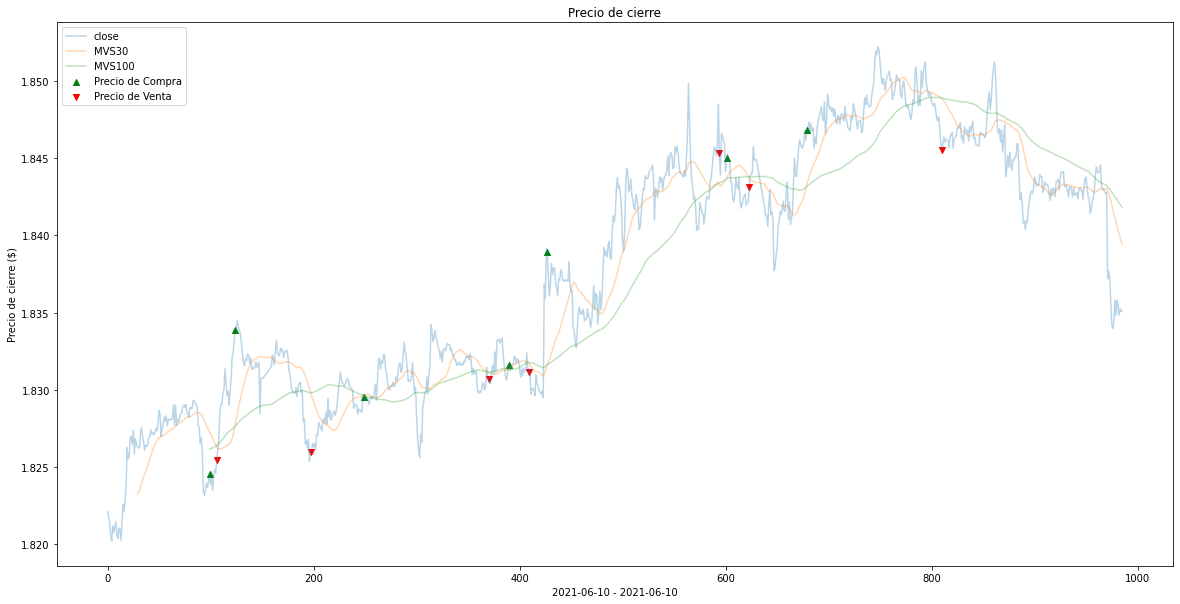

In [220]:
plt.figure()
plt.plot(data_intraday['close'], label = 'close', alpha = 0.3)
plt.plot(data_intraday['MVS30'], label = 'MVS30', alpha = 0.3)
plt.plot(data_intraday['MVS100'], label = 'MVS100', alpha = 0.3)
plt.scatter(data_intraday.index, data_intraday['PosibleCompra'], label = 'Precio de Compra', marker = '^', color = 'green')
plt.scatter(data_intraday.index, data_intraday['PosibleVenta'], label = 'Precio de Venta', marker = 'v', color = 'red')
plt.title('Precio de cierre')
plt.xlabel( str(np.min(data_intraday.TradeDate) ) + ' - ' +  str(np.min(data_intraday.TradeDate) ))
plt.ylabel('Precio de cierre ($)')
plt.legend(loc = 'upper left')
plt.show()

In [221]:
import plotly.graph_objects  as go

import plotly.express as px



In [222]:
!pip install chart-studio

     |████████████████████████████████| 71kB 2.7MB/s 


In [223]:
import chart_studio as ch

In [226]:
data_intraday["TimeDate"] = data_intraday.index
data_intraday.head(2)


,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1,close_return,close_log_return,MVS30,MVS100,PosibleCompra,PosibleVenta,TimeDate
0,1.82195,1.82230,1.82108,1.82213,2021-06-10,08:00:00,2021-06-10 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.82216,1.82224,1.82114,1.82178,2021-06-10,08:15:00,2021-06-10 08:15:00,-0.000192,-0.000192,-0.000192,-0.000192,NaN,NaN,NaN,NaN,1


In [230]:


df_long=pd.melt(data_intraday, id_vars=['TimeDate','date'], value_vars=['MVS30', 'MVS100'])


df_long.head(3)

,TimeDate,date,variable,value
0,0,2021-06-10 08:00:00,MVS30,NaN
1,1,2021-06-10 08:15:00,MVS30,NaN
2,2,2021-06-10 08:30:00,MVS30,NaN


In [233]:
# plotly 
df_long.rename(columns={'value': 'Prices'})
etiqueta_titulo='Prices:' + fromD + '/' +  toD
fig = px.line(df_long, x='date', y='value', color='variable', title= etiqueta_titulo )

# Show plot 
fig.show()

In [ ]:
data = [ dict (
    type = 'candlestick',
    open = data_intraday['open'],
    high = data_intraday['high'], 
    low = data_intraday['low'],
    close = data_intraday['close'],
    x=data_intraday.index,
    yaxis = 'Price $',
    name = 'GS',
)]

In [ ]:
layout=dict()

fig = dict( data=data, layout=layout )

In [ ]:
fig['layout'] = dict()
fig['layout']['plot_bgcolor'] = 'rgb(250, 250, 250)'
fig['layout']['xaxis'] = dict( rangeselector = dict( visible = True ) )
fig['layout']['yaxis'] = dict( domain = [0, 0.2], showticklabels = False )
fig['layout']['yaxis2'] = dict( domain = [0.2, 0.8] )
fig['layout']['legend'] = dict( orientation = 'h', y=0.9, x=0.3, yanchor='bottom' )
fig['layout']['margin'] = dict( t=40, b=40, r=40, l=40 )

In [ ]:
rangeselector=dict(
    visibe = True,
    x = 0, y = 0.9,
    bgcolor = 'rgba(150, 200, 250, 0.4)',
    font = dict( size = 13 ),
    buttons=list([
        dict(count=1,
             label='reset',
             step='all'),
        dict(count=1,
             label='1yr',
             step='year',
             stepmode='backward'),
        dict(count=3,
            label='3 mo',
            step='month',
            stepmode='backward'),
        dict(count=1,
            label='1 mo',
            step='month',
            stepmode='backward'),
        dict(step='all')
    ]))
    

In [ ]:
fig['data'].append( dict( x=df_long['TimeDate'], y=df_long['value'], type='scatter', mode='lines', line = dict( width = 1 ) ))

In [ ]:
def bbands(price, window_size=10, num_of_std=5):
    rolling_mean = price.rolling(window=window_size).mean()
    rolling_std  = price.rolling(window=window_size).std()
    upper_band = rolling_mean + (rolling_std*num_of_std)
    lower_band = rolling_mean - (rolling_std*num_of_std)
    return rolling_mean, upper_band, lower_band

bb_avg, bb_upper, bb_lower = bbands(data_intraday.close)

fig['data'].append( dict( x=data_intraday.index, y=bb_upper, type='scatter', yaxis='y2', 
                         line = dict( width = 1 ),
                         marker=dict(color='#ccc'), hoverinfo='none', 
                         legendgroup='Bollinger Bands', name='Bollinger Bands') )

fig['data'].append( dict( x=data_intraday.index, y=bb_lower, type='scatter', yaxis='y2',
                         line = dict( width = 1 ),
                         marker=dict(color='#ccc'), hoverinfo='none',
                         legendgroup='Bollinger Bands', showlegend=False ) )

In [ ]:
candlestick = go.Candlestick(
    x = data_intraday.index,
    open = data_intraday['open'],
    high = data_intraday['high'], 
    low = data_intraday['low'],
    close = data_intraday['close']
)
# create a plot


fig = go.Figure(data=[candlestick])

In [161]:
fig.show()
#show the plot




NameError: ignored

AttributeError: ignored

In [ ]:
fig.show()

plotly.graph_objs._figure.Figure